In [1]:
import pandas as pda
import numpy as npy 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
data = pda.read_csv("../../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
prediction_cols = ["TV","Radio","Newspaper"]

In [4]:
X = data[prediction_cols]
Y = data["Sales"]

In [5]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,2,step=1)
selector = selector.fit(X,Y)

C:\Users\JDCC\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [6]:
selector.support_

array([ True,  True, False])

In [7]:
X_pred = X[["TV","Radio"]]

In [8]:
lm = LinearRegression()
lm.fit(X_pred,Y)

LinearRegression()

In [9]:
lm.coef_

array([0.04575482, 0.18799423])

In [10]:
lm.score(X_pred,Y)

0.8971942610828957

## Regresion Lineal con variables categoricas

In [11]:
data = pda.read_csv("../../datasets/ecom-expense/Ecom Expense.csv")
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [12]:
d_gender = pda.get_dummies(data["Gender"],prefix="Gender")

In [13]:
d_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [14]:
d_city = pda.get_dummies(data["City Tier"],prefix="City")

In [15]:
d_city.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [16]:
column_names = data.columns.values.tolist()

In [17]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [18]:
d_new = data[column_names].join(d_gender)
column_names = d_new.columns.values.tolist()
d_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [19]:
d_new = d_new[column_names].join(d_city)
column_names = d_new.columns.values.tolist()
d_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [20]:
d_city

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [21]:
prediction_cols = ["Monthly Income","Transaction Time","Gender_Female","Gender_Male","City_Tier 1","City_Tier 2","City_Tier 3","Record"]

In [22]:
X = d_new[prediction_cols]
Y = d_new["Total Spend"]

In [23]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [24]:
lm.score(X,Y)

0.9179923586131016

In [25]:
lm.intercept_

-79.4171303013718

In [26]:
list(zip(prediction_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589437),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554664),
 ('City_Tier 1', 76.76432601049494),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972778),
 ('Record', 772.2334457445645)]

In [27]:
lm.score(X,Y)

0.9179923586131016

In [28]:
d_new["Prediction"] = -79.4171303013718 + d_new["Monthly Income"]*0.14753898049205738 + d_new["Transaction Time"] + d_new["Gender_Female"]*-131.02501325554675 + d_new["Gender_Male"]*131.02501325554664 + d_new["City_Tier 1"]*76.76432601049494 + d_new["City_Tier 2"]*55.13897430923278 + d_new["City_Tier 3"]*-131.90330031972778 + d_new["Record"]*772.2334457445645

In [29]:
d_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,5434.110102
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4906.676021
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5895.211459
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8389.318897
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3922.853284


In [30]:
SSD = sum((d_new["Total Spend"] - d_new["Prediction"])**2)

In [31]:
SSD

2073068241.0739374

In [32]:
RSE = npy.sqrt(SSD/(len(d_new)-len(prediction_cols)-1))

In [33]:
RSE

938.633036205847

In [34]:
s_m = npy.mean(d_new["Total Spend"])

In [35]:
error = RSE/s_m
error

0.1522969606666851

## Eliminando redundancias

In [36]:
dummy_gender = pda.get_dummies(d_new["Gender"],prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [37]:
dummy_city = pda.get_dummies(d_new["City Tier"]).iloc[:,1:]
dummy_city.head()

,Tier 2,Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [38]:
column_names = data.columns.values.tolist()
d_new = data[column_names].join(dummy_gender)
column_names = d_new.columns.values.tolist()
d_new = d_new[column_names].join(dummy_city)
d_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,Tier 2,Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [39]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Male","Tier 2","Tier 3","Record"]
X = d_new[feature_cols]
Y = d_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [40]:
print(lm.intercept_)

-133.67781754642238


In [41]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589837),
 ('Gender_Male', 262.0500265110939),
 ('Tier 2', -21.62535170126288),
 ('Tier 3', -208.66762633022293),
 ('Record', 772.2334457445637)]

In [42]:
lm.score(X,Y)

0.9179923586131016

## Transformacion de variables para conseguir una relacion no lineal

In [43]:
data = pda.read_csv("../../datasets/auto/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [44]:
data.shape

(406, 9)

In [45]:
data["displacement"] = data["displacement"].fillna(npy.mean(data["displacement"]))

Text(0, 0.5, "Consumo 'mpg'")

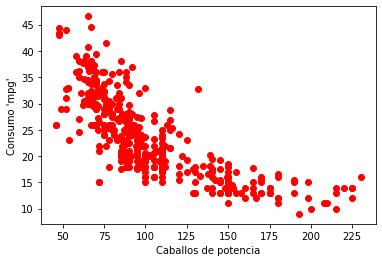

In [46]:
%matplotlib inline
data["mpg"] = data["mpg"].dropna()
data["horsepower"] = data["horsepower"].dropna()
plt.plot(data["horsepower"],data["mpg"],"ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo 'mpg'")

## Modelo de Regresion Lineal
* mpg = a+b*horspower

In [47]:
X = data["horsepower"].fillna(data["horsepower"].mean())
Y = data["mpg"].fillna(data["mpg"].mean())

In [48]:
lm = LinearRegression()
lm.fit(X[:,npy.newaxis],Y)

LinearRegression()

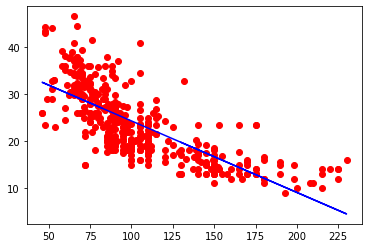

In [49]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X[:,npy.newaxis]),color="blue")

In [50]:
lm.score(X[:,npy.newaxis],Y)

0.574653340645025

In [51]:
SSD = npy.sum((Y-lm.predict(X[:,npy.newaxis]))**2)
RSE = npy.sqrt(SSD/(len(X[:,npy.newaxis])-1))

In [52]:
y_mean = npy.mean(Y)
error = RSE/y_mean

In [53]:
SSD,RSE,y_mean,error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

## Modelo de Regresion Cuadratico
* mpg = a+b* horspower**2

In [54]:
X = X**2

In [55]:
lm = LinearRegression()
lm.fit(X[:,npy.newaxis],Y)

LinearRegression()

In [56]:
lm.score(X[:,npy.newaxis],Y)

0.4849887034823205

In [57]:
SSD = npy.sum((Y-lm.predict(X[:,npy.newaxis]))**2)
RSE = npy.sqrt(SSD/(len(X[:,npy.newaxis])-1))
y_mean = npy.mean(Y)
error = RSE/y_mean
SSD,RSE,y_mean,error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de Regresion lineal y Cuadratico
* mpg = a+b* horspower + c * horspower**2

In [58]:
X = data["horsepower"].fillna(data["horsepower"].mean())
Y = data["mpg"].fillna(data["mpg"].mean())

In [59]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,npy.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print(lm.score(X_data,Y))

0.6439066584257469
0.6444678885560744
0.6467674189704502
0.6547512491363403
0.6572723780156957
0.6538575072115177
0.6512432185886969
0.6510536273625336
0.6523567330766675
0.651049385941096


In [60]:
poly = PolynomialFeatures(degree=2)

In [61]:
X = poly.fit_transform(X[:,npy.newaxis])

In [62]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [63]:
lm.score(X,Y)

0.6439066584257469

## Outliers

In [64]:
X = data["displacement"].fillna(npy.mean(data["displacement"]))
Y = data["mpg"].fillna(npy.mean(data["mpg"]))

In [67]:
lm = LinearRegression()
lm.fit(X[:,npy.newaxis],Y)

LinearRegression()

In [69]:
lm.score(X[:,npy.newaxis],Y)

0.6261049762826918

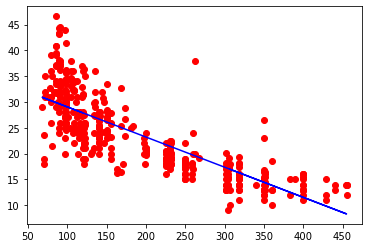

In [75]:
%matplotlib inline
plt.plot(data["displacement"],data["mpg"],'ro')
plt.plot(X,lm.predict(X[:,npy.newaxis]),'b')

In [80]:
data[(data["displacement"]>250)&(data["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [84]:
data[(data["displacement"]>300)&(data["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [90]:
data = data.drop([395,258,305,372])

In [93]:
X = data["displacement"].fillna(npy.mean(data["displacement"]))
Y = data["mpg"].fillna(npy.mean(data["mpg"]))
lm = LinearRegression()
lm.fit(X[:,npy.newaxis],Y)
X_data = X[:,npy.newaxis]

In [94]:
lm.score(X_data,Y)

0.6466514317531822

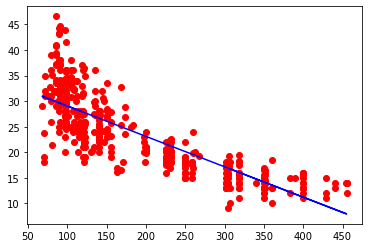

In [98]:
%matplotlib inline
plt.plot(data["displacement"],data["mpg"],'ro')
plt.plot(X,lm.predict(X_data),'b')